In [1]:
# If needed: pip install libraries (Colab often has these by default)
# !pip install pandas numpy matplotlib seaborn scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
np.random.seed(42)
n_samples = 1000

# Simulated telemetry features
data = {
    "battery_voltage": np.random.normal(loc=3.7, scale=0.1, size=n_samples),
    "temperature": np.random.normal(loc=25, scale=2, size=n_samples),
    "cpu_load": np.random.normal(loc=40, scale=10, size=n_samples),
    "signal_strength": np.random.normal(loc=-70, scale=5, size=n_samples),
}

# Insert anomalies
anomaly_indices = np.random.choice(n_samples, size=30, replace=False)
for i in anomaly_indices:
    data["battery_voltage"][i] += np.random.normal(0.5, 0.2)
    data["temperature"][i] += np.random.normal(10, 3)
    data["cpu_load"][i] += np.random.normal(30, 5)
    data["signal_strength"][i] += np.random.normal(-20, 3)

df = pd.DataFrame(data)
df["is_anomaly"] = 0
df.loc[anomaly_indices, "is_anomaly"] = 1

df.head()

,battery_voltage,temperature,cpu_load,signal_strength,is_anomaly
0,3.749671,27.798711,33.248217,-79.539038,0
1,3.686174,26.849267,38.554813,-74.301925,0
2,3.764769,25.119261,32.075801,-72.068028,0
3,3.852303,23.706126,36.920385,-60.561562,0
4,3.676585,26.396447,21.063853,-67.217234,0


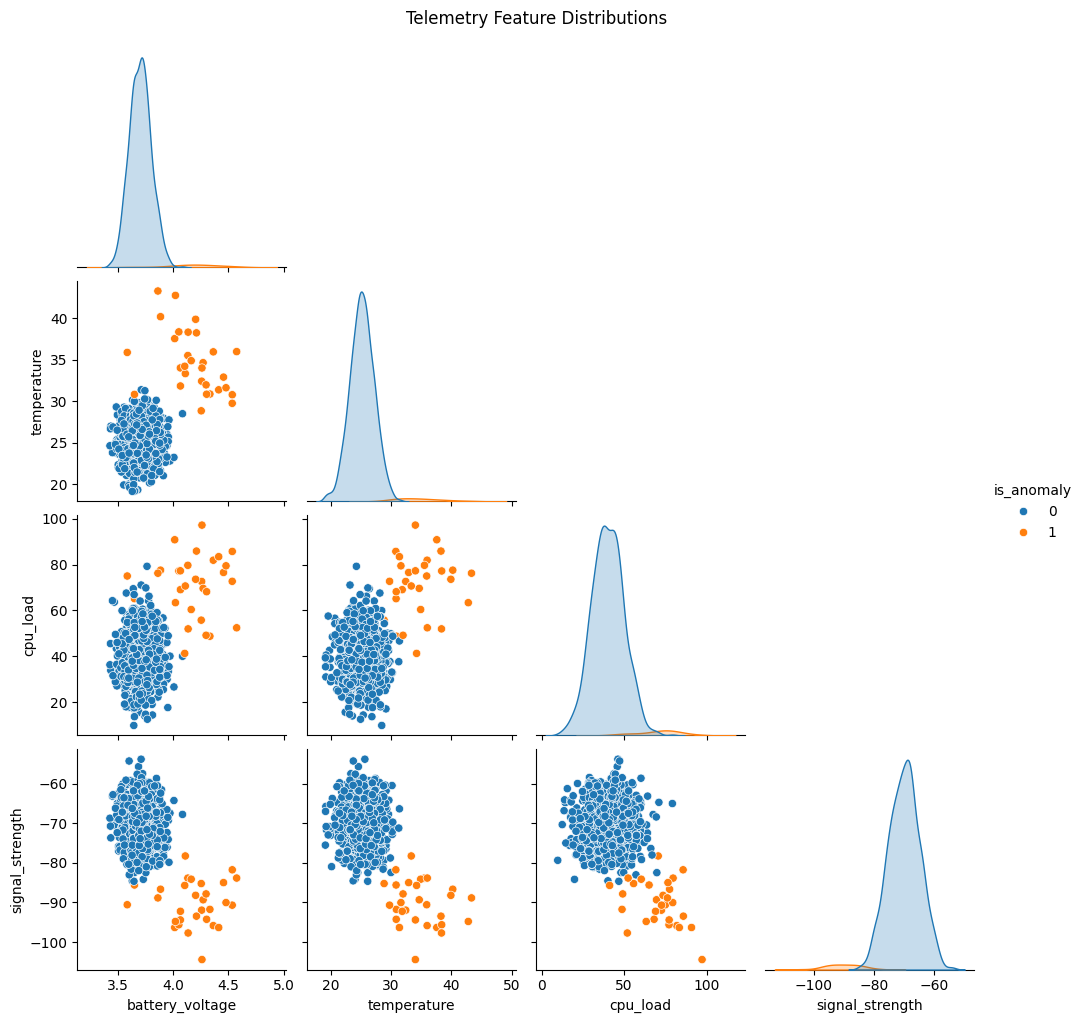

In [3]:
sns.pairplot(df, hue="is_anomaly", diag_kind="kde", corner=True)
plt.suptitle("Telemetry Feature Distributions", y=1.02)
plt.show()

In [4]:
features = ["battery_voltage", "temperature", "cpu_load", "signal_strength"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [5]:
model = IsolationForest(contamination=0.03, random_state=42)
df["predicted_anomaly"] = model.fit_predict(X_scaled)
df["predicted_anomaly"] = df["predicted_anomaly"].map({1: 0, -1: 1})  # 1 for anomaly

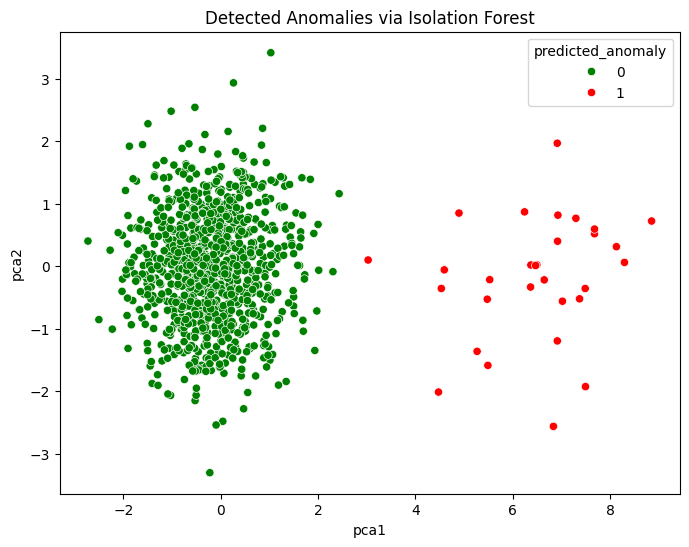

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="predicted_anomaly", palette=["green", "red"])
plt.title("Detected Anomalies via Isolation Forest")
plt.show()

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(df["is_anomaly"], df["predicted_anomaly"]))

print("\nClassification Report:")
print(classification_report(df["is_anomaly"], df["predicted_anomaly"]))

Confusion Matrix:
[[970   0]
 [  0  30]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       970
           1       1.00      1.00      1.00        30

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

